In [3]:
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt 

## Thijs' code:
### Seeing if missing RGB and IR are same/differnet:

In [21]:
## Using the directory stucture I made for the DSG: ( /RGB/date/images/ )

folder_rgb = '/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/12.5cm Aerial Photo'
folder_ir = '/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/50cm Colour Infrared' 
folder_data = {'rgb': folder_rgb, 'ir': folder_ir}
date_folders = dict() 
list_tiles = dict()

set_all_tiles = []

for key, fol in folder_data.items():  # loop through RGB and IR
    date_folders[key] = os.listdir(fol)
    list_tiles[key] = dict()
    for date in date_folders[key]:  # loop through old and new dates
        list_tiles[key][date] = []
        current_folder = os.path.join(fol, date)
        apgb_data = os.listdir(current_folder)  # list all folders (containing 1 tile each) for this data set
        for apgb_folder in apgb_data:
            files_apgb = os.listdir(os.path.join(current_folder, apgb_folder))
            files_apgb = [x[:6] for x in files_apgb if x[-4:] == '.tif']  # get tile name 
            assert len(files_apgb) == 1, 'expected only 1 tif file'
            list_tiles[key][date].append(files_apgb[0])  # append tile name 

        print(f'{key} data from {date} contains {len(list_tiles[key][date])} files')
    set_all_tiles = set_all_tiles + list_tiles[key][date]
set_all_tiles = set(set_all_tiles)
## Turn into sets to look at difference between IR and RGB sets:
set_rgb_old = set(list_tiles['rgb']['2010-2017'])
set_ir_old = set(list_tiles['ir']['2007-2017'])

diff_ir_rgb = set_ir_old - set_rgb_old
diff_rgb_ir = set_rgb_old - set_ir_old

print(f'# of tiles in IR but NOT in RGB: {len(diff_ir_rgb)}')
print(f'# of tiles in RGB but NOT in IR: {len(diff_rgb_ir)}')

rgb data from 2020-2021 contains 78 files
rgb data from 2010-2017 contains 78 files
ir data from 2007-2017 contains 78 files
ir data from 2020-2021 contains 78 files
# of tiles in IR but NOT in RGB: 0
# of tiles in RGB but NOT in IR: 0


In [22]:
diff_new_old = dict()
missing_tiles = dict()
for key, fol in folder_data.items():
    assert key in ['rgb', 'ir'], 'unexpected key'
    date_folders[key].sort()
    assert len(date_folders[key]) == 2 and date_folders[key][1][:4] == '2020', 'format not as expected'
    date_old = date_folders[key][0]
    date_new = date_folders[key][1]
    set_new = set(list_tiles[key][date_new])
    set_old = set(list_tiles[key][date_old])

    assert len(set_old - set_new) == 0, 'did not expect new data missing'
    missing_tiles[key] = set_new - set_old

missing_tiles_total = list(missing_tiles['rgb'].union(missing_tiles['ir']))
print(len(missing_tiles_total))
t_missing = missing_tiles_total
t_missing



0


[]

### Order David's new tiles:

In [17]:

t_add = ['SK0786', 'SK0787', 'SK0789', 'SK0886', 'SK0888',
         'SK0889', 'SK1086', 'SK1087', 'SK1088', 'SK1187',
         'SK1188', 'SK1287', 'SK1288', 'SK1387', 'SK1388',
         'SK0993', 'SK0894', 'SK0994', 'SK0895', 'SK0995',
         'SK1095', 'SK0996', 'SK1096', 'SK1196', 'SK0897',
         'SK0997', 'SK1097', 'SE0805', 'SE0905', 'SE0704',
         'SE0804', 'SE0904', 'SE0903', 'SE1103', 'SK2585',
         'SK2584', 'SK1092', 'SK1075', 'SK0076', 'SE0504']

t_wp = ['SK1369', 'SK1767', 'SK1977', 'SK0853', 'SK1260']

t_add = t_add + t_wp
t_current = list(set_all_tiles)
# path_current_80_tiles = '/home/thijs/repos/cnn-land-cover/content/evaluation_sample_50tiles/eval_all_tile_outlines/eval_all_tile_outlines.shp'
# df_80_tiles = gpd.read_file(path_current_80_tiles)
# t_current = list(df_80_tiles['PLAN_NO'])

print(f'{len(t_add)} new tiles selected')

t_add_unique = list(set(t_add) - set(t_current))
print(f'{len(t_add_unique)} new tiles that werent selected before')

path_tiles = '/home/thijs/Google Drive/peak district/data/Landscape_Character_Grid 2019-08-29 09-57-26/Landscape_Character_Grid.shp'
df_tiles = gpd.read_file(path_tiles)
# df_tiles_add = df_tiles[df_tiles['PLAN_NO'].isin(t_add_unique)]

# path_save = '/home/thijs/repos/cnn-land-cover/content/evaluation_sample_50tiles/eval_40_new_change_tiles/eval_40_new_change_tiles.shp'
# df_tiles_add.to_file(path_save)


45 new tiles selected
0 new tiles that werent selected before


1. Remove incomplete data points
2. See how many old tiles need to be removed to insert all new tiles (or remove selection of tiles such that the total is not exactly 80)
3. Remove that many old tiles. 
4. Insert new tiles

In [18]:
t_no_change = ['SK1661', 'SK1154', 'SK0852',
                'SK0752', 'SK0554', 'SK0456', 'SK1056', 'SK1357',
                'SK1258', 'SK1959', 'SK1360', 'SK2161', 'SK1871',
                'SK1672', 'SJ9679', 'SK0981', 'SK1082', 'SK1683',
                'SK0684', 'SK0685', 'SK0686', 'SK1588', 'SK1690',
                'SK0790', 'SK2091', 'SK1992', 'SK0595', 'SK2496',
                'SK2396', 'SK1998', 'SK1798', 'SE1400', 'SE0800',
                'SE1203', 'SE1003']

print(f'There are {len(t_current)} current tiles')

## Remove names that are NOT in t_current
t_no_change = [x for x in t_no_change if x in t_current]
t_missing = [x for x in t_missing if x in t_current]
## Remove names that ARE in t_current
t_add = [x for x in t_add if x not in t_current]

print(f'There are {len(t_missing)} missing/incomplete tiles')
print(f'There are {len(t_no_change)} no-change tiles')
print(f'There are {len(t_add)} new tiles')



There are 80 current tiles
There are 2 missing/incomplete tiles
There are 10 no-change tiles
There are 0 new tiles


## Delete old files:

In [20]:
import shutil 
import numpy as np 

folder_delete = '/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/'
bool_delete = True


# n_delete = len(t_add) 
# n_del_no_change = n_delete - len(t_missing)
# assert n_del_no_change <= len(t_no_change)

# inds_random_del = np.random.choice(a=len(t_no_change), size=n_del_no_change, replace=False)
# t_no_change_del = [t_no_change[x] for x in inds_random_del]
# t_del = t_no_change_del + t_missing 
# assert len(t_del) == len(t_add)

t_del = t_missing
assert len(t_del) == 2
print(t_del)
print(f'{len(t_del)} tiles to be deleted')

# subfolders_delete = [os.path.join(folder_delete, x) for x in os.listdir(folder_delete) 
#                      if os.path.isdir(os.path.join(folder_delete, x))]
subfolders_delete = ['/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/2m Digital Surface Model',
                    '/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/12.5cm Aerial Photo/2010-2017',
                    '/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/50cm Colour Infrared/2007-2017',
                    '/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/12.5cm Aerial Photo/2020-2021',
                    '/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/50cm Colour Infrared/2020-2021',
                    '/media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/5m Digital Terrain Model']

for sf in subfolders_delete:
    tile_folders = [os.path.join(sf, x) for x in os.listdir(sf)]
    list_tf_delete = []
    for tf in tile_folders:
        content_tf = os.listdir(tf)
        tilename_tf = [x[:6] for x in os.listdir(tf) if x[-4:] == '.tif']
        assert len(tilename_tf) == 1, tilename_tf
        tilename_tf = tilename_tf[0]

        if tilename_tf in t_del: 
            list_tf_delete.append(tf)

    print(f'{len(list_tf_delete)} tile folders will be deleted for {sf}')
    if bool_delete:
        for tf in list_tf_delete:
            shutil.rmtree(tf)
        print('deleted')

['SK1977', 'SK1767']
2 tiles to be deleted
2 tile folders will be deleted for /media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/2m Digital Surface Model
deleted
0 tile folders will be deleted for /media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/12.5cm Aerial Photo/2010-2017
deleted
1 tile folders will be deleted for /media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/50cm Colour Infrared/2007-2017
deleted
2 tile folders will be deleted for /media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/12.5cm Aerial Photo/2020-2021
deleted
2 tile folders will be deleted for /media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/50cm Colour Infrared/2020-2021
deleted
2 tile folders will be deleted for /media/thijs/hooghoudt/GIS projects/PD/DSG/PDNPA_DSG_imagery_data/5m Digital Terrain Model
deleted


## David's code:

In [4]:
# select 80 tile names from files

# training tiles (in with my 80 tiles AP)
tr_t = ['SE1301','SK0560', 'SK0792', 'SK0796', 'SK1095', 'SK1295', 'SK2391', 'SK2479', 'SK2567', 'SK2669', 'SK2969']

# store the file names in a list
t_80 = []

# list
for x in os.listdir('C:/Users/alexad/Documents/ArcGIS/Projects/APGB/AP'):
    if x.endswith(".tab"):
        t_80.append(os.path.splitext(x)[0])

# remove training tiles from list
t_80 = list(set(t_80) - set(tr_t))

print(t_80)
print(len(t_80)) # 80 we're OK (save them here)

['SK0075', 'SK1360', 'SK0567', 'SK1588', 'SK2461', 'SK0456', 'SK0752', 'SK2161', 'SK1975', 'SK1661', 'SJ9679', 'SK1992', 'SK2196', 'SK1959', 'SK2777', 'SK0987', 'SE0800', 'SE0705', 'SK1874', 'SK0981', 'SE1203', 'SK0956', 'SK1258', 'SK1082', 'SK2677', 'SK0464', 'SK0852', 'SK1894', 'SK2484', 'SJ9772', 'SE1400', 'SK1154', 'SK1998', 'SK1399', 'SK1776', 'SK0077', 'SK0667', 'SK0961', 'SE0505', 'SK1472', 'SK1672', 'SK0988', 'SK0790', 'SK0879', 'SK0366', 'SK2055', 'SK1690', 'SK1464', 'SK2091', 'SK1566', 'SK0595', 'SK1683', 'SJ9566', 'SE1100', 'SK2074', 'SK2096', 'SK1357', 'SK1091', 'SK1871', 'SK2496', 'SE0503', 'SE0407', 'SK1568', 'SE1003', 'SK0686', 'SK0554', 'SK2396', 'SK0860', 'SK0665', 'SK1798', 'SK1797', 'SK1056', 'SK1778', 'SK0685', 'SK0896', 'SK0971', 'SK0682', 'SK0684', 'SK1896', 'SK0369']
80


In [5]:
# lets see which of the 80 tiles have no ~2010 data (more complicated as in subfolders) we may as well remove them from our 80 anyway

# store the file names in a list
t_2010 = []

# top level path
path = 'C:/Users/alexad/Documents/ArcGIS/Projects/APGB/12.5cm_2010'

# walk through the directory structure
for (root, dirs, file) in os.walk(path):
    for f in file:
        if '.tab' in f:
            t_2010.append(os.path.splitext(f)[0])

print(t_2010)
print(len(t_2010)) # 60 we're OK (save them here)

['SK0369', 'SK0456', 'SK0554', 'SK0684', 'SK0685', 'SK0686', 'SE0503', 'SK0752', 'SK0790', 'SK0852', 'SK0896', 'SK0961', 'SK0988', 'SK1357', 'SK1360', 'SK1399', 'SE0705', 'SK1472', 'SK1588', 'SK1661', 'SK1683', 'SK1798', 'SK1871', 'SE0800', 'SK1896', 'SK1992', 'SK1998', 'SK2055', 'SK2091', 'SK2096', 'SK2196', 'SK2496', 'SE1203', 'SE0407', 'SE0505', 'SE1003', 'SE1100', 'SK0075', 'SK0595', 'SK0860', 'SE1400', 'SK0956', 'SK0971', 'SK0981', 'SK0987', 'SK1056', 'SK1082', 'SK1091', 'SK1154', 'SK1258', 'SK1672', 'SK1690', 'SK1797', 'SK1894', 'SK1959', 'SK2161', 'SK2396', 'SK2461', 'SK2484', 'SJ9679']
60


In [6]:
# lets find the items from ~2010 with no ~2022 available
t_2010 = list(set(t_80) - set(t_2010))

print(t_2010)
print(len(t_2010)) # 20 we're OK (save them here)

['SK0879', 'SK0366', 'SK0567', 'SK1464', 'SK1566', 'SJ9566', 'SK1975', 'SK2074', 'SK2777', 'SK1874', 'SK1568', 'SK2677', 'SK0464', 'SJ9772', 'SK0665', 'SK1776', 'SK0077', 'SK1778', 'SK0667', 'SK0682']
20


In [7]:
# lets remove these from the original list to create a fresh list
t_2022 = list(set(t_80) - set(t_2010))

print(t_2022)
print(len(t_2022)) # 60 we're OK (save them here)

['SK0075', 'SK1360', 'SK1588', 'SK2461', 'SK0456', 'SK2055', 'SK1690', 'SK0752', 'SK2091', 'SK0595', 'SK1683', 'SK2161', 'SE1100', 'SK1896', 'SK1661', 'SJ9679', 'SK1992', 'SK1672', 'SK2096', 'SK2196', 'SK1357', 'SK1959', 'SK1091', 'SK0987', 'SE0800', 'SE0705', 'SK0981', 'SK1871', 'SK2496', 'SE1203', 'SK0956', 'SE0503', 'SE0407', 'SK1258', 'SE1003', 'SK1082', 'SK0686', 'SK0554', 'SK2396', 'SK1894', 'SK2484', 'SK0852', 'SE1400', 'SK1998', 'SK1154', 'SK0860', 'SK1399', 'SK1798', 'SK1797', 'SK1056', 'SK0685', 'SK0896', 'SK0961', 'SE0505', 'SK1472', 'SK0971', 'SK0684', 'SK0988', 'SK0790', 'SK0369']
60


In [8]:
# create a list comprised of 'not much change' from visiual inspection in GIS
t_no_change = ['SK1661', 'SK1154', 'SK0852',
          'SK0752', 'SK0554', 'SK0456', 'SK1056', 'SK1357',
          'SK1258', 'SK1959', 'SK1360', 'SK2161', 'SK1871',
          'SK1672', 'SJ9679', 'SK0981', 'SK1082', 'SK1683',
          'SK0684', 'SK0685', 'SK0686', 'SK1588', 'SK1690',
          'SK0790', 'SK2091', 'SK1992', 'SK0595', 'SK2496',
          'SK2396', 'SK1998', 'SK1798', 'SE1400', 'SE0800',
          'SE1203', 'SE1003']

print(len(t_no_change))

# Lets remove these from the latest data set
#t_2022 = list(set(t_2022) - set(t_no_change))
t_start_again = list(set(t_2022) - set(t_no_change))


print(t_start_again)
print(len(t_start_again)) # 35 showed little change (25 remaining)

35
['SK0075', 'SK2461', 'SK2055', 'SE1100', 'SK1896', 'SK2096', 'SK2196', 'SK1091', 'SK0987', 'SE0705', 'SE0503', 'SK0956', 'SE0407', 'SK1894', 'SK0860', 'SK2484', 'SK1399', 'SK1797', 'SK0896', 'SK0961', 'SE0505', 'SK1472', 'SK0971', 'SK0988', 'SK0369']
25


In [32]:
# create a list of new tiles of 'change' from visual inspection in GIS
# lets add extra as APGB might not have ~2010 for all km2

t_add = ['SK0786', 'SK0787', 'SK0789', 'SK0886', 'SK0888',
         'SK0889', 'SK1086', 'SK1087', 'SK1088', 'SK1187',
         'SK1188', 'SK1287', 'SK1288', 'SK1387', 'SK1388',
         'SK0993', 'SK0894', 'SK0994', 'SK0895', 'SK0995',
         'SK1095', 'SK0996', 'SK1096', 'SK1196', 'SK0897',
         'SK0997', 'SK1097', 'SE0805', 'SE0905', 'SE0704',
         'SE0804', 'SE0904', 'SE0903', 'SE1103', 'SK2585',
         'SK2584', 'SK1092', 'SK1075', 'SK0076', 'SE0504']

print(len(t_add)) # That's 40 lets add to t_start_again

t_latest = t_add + t_start_again
print(len(t_latest)) # 65 tiles 

len(t_latest) != len(set(t_latest)) # check for duplicates

40
65


False

In [33]:
# Further change tiles to add 16/05/23 of 'change' from visual inspection in GIS
t_add2 = ['SK2462', 'SK2463', 'SK1568', 'SK1569', 'SK1669', 'SK1668', 'SK1862', 'SK2467', 'SK2567', 'SK2563',
           'SK2069', 'SK0498', 'SK0598', 'SK0698', 'SK1375', 'SK1475', 'SK1367', 'SK1667']

t_latest = t_latest + t_add2
print(len(t_latest)) # 83 tiles

len(t_latest) != len(set(t_latest)) # check for duplicates

83


False

In [23]:
# Load in the .shp
lcg = "../content/landscape_character_grid/Landscape_Character_Grid.shp"

In [24]:
# read geopandas
gd = gpd.read_file(lcg)

In [25]:
selection = gd[gd['PLAN_NO'].isin(t_latest)]

In [26]:
selection.head(5)

,PLAN_NO,MAPNUM,SQNUM,B1_70,B2_70,B3_70,B6_70,B1_80,B2_80,B3_80,...,INPARK,COUNTY,DISTRICT,PARISH,TYSQ10,EASTM,NORTHM,ONE,MI_PRINX,geometry
67,SE0407,3,15,0,0,0,0,0,0,0,...,T,WESTYOR,KIRKLEE,hidders,32,404500,407500,1,68,"POLYGON ((404000.001 406999.997, 404000.001 40..."
78,SE0503,7,16,0,0,0,2,0,0,0,...,T,DERBYSH,HIGHPEA,tintwis,32,405500,403500,1,79,"POLYGON ((405000.003 403000.002, 405000.003 40..."
79,SE0504,7,21,0,0,0,1,0,0,0,...,T,GT MAN,OLDHAM,saddlew,32,405500,404500,1,80,"POLYGON ((405000.003 403999.995, 405000.003 40..."
80,SE0505,4,1,0,0,0,0,0,0,0,...,T,GT MAN,OLDHAM,saddlew,32,405500,405500,1,81,"POLYGON ((405000.003 404999.999, 405000.003 40..."
109,SE0704,7,23,0,0,0,0,0,0,0,...,T,WESTYOR,KIRKLEE,holmeva,32,407500,404500,1,110,"POLYGON ((406999.999 403999.995, 406999.999 40..."


In [27]:
out_file_path = r"../content/landscape_character_grid/selection_latest_83km2.shp"
selection.to_file(out_file_path)

## Explore data tiles

In [21]:
import sys 
sys.path.append('../scripts/')
import land_cover_analysis as lca
import land_cover_visualisation as lcv

adding scrub
splitting up heath
adding wetland
adding transport


In [36]:
path_tile_old = '/home/thijs/Google Drive/peak district/Turing PD DSG/follow_up_data_dsg/example_tiles_complete/50cm Colour Infrared/2007-2017/119119-3_CIR_47_Shape/SK2096.tif'
path_tile_new = '/home/thijs/Google Drive/peak district/Turing PD DSG/follow_up_data_dsg/example_tiles_complete/50cm Colour Infrared/2020-2021/119119-1_CIR_47_Shape/SK2096.tif'


In [37]:
tile_old = lca.load_tiff(path_tile_old)
tile_new = lca.load_tiff(path_tile_new)

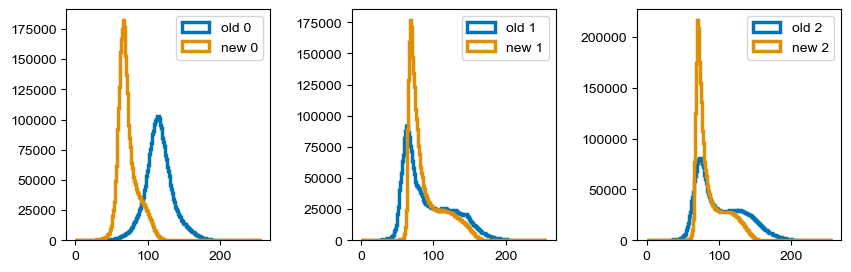

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3), gridspec_kw={'wspace': 0.4})
# ax[0]
for chan in range(3):
    ax[chan].hist(tile_old[chan, ...].ravel(), label=f'old {chan}', bins=np.arange(257), histtype='step', linewidth=2.5)
    ax[chan].hist(tile_new[chan, ...].ravel(), label=f'new {chan}', bins=np.arange(257), histtype='step', linewidth=2.5)

for cax in ax:
    cax.legend()

        

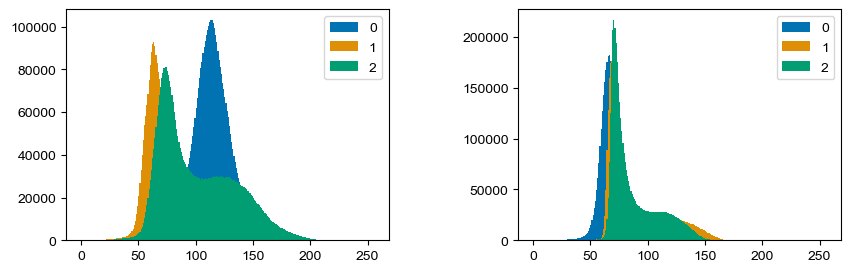

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), gridspec_kw={'wspace': 0.4})
# ax[0]
for chan in range(3):
    ax[0].hist(tile_old[chan, ...].ravel(), label=chan, bins=np.arange(257))
    ax[1].hist(tile_new[chan, ...].ravel(), label=chan, bins=np.arange(257))

for ii in range(2):
    ax[ii].legend()

        

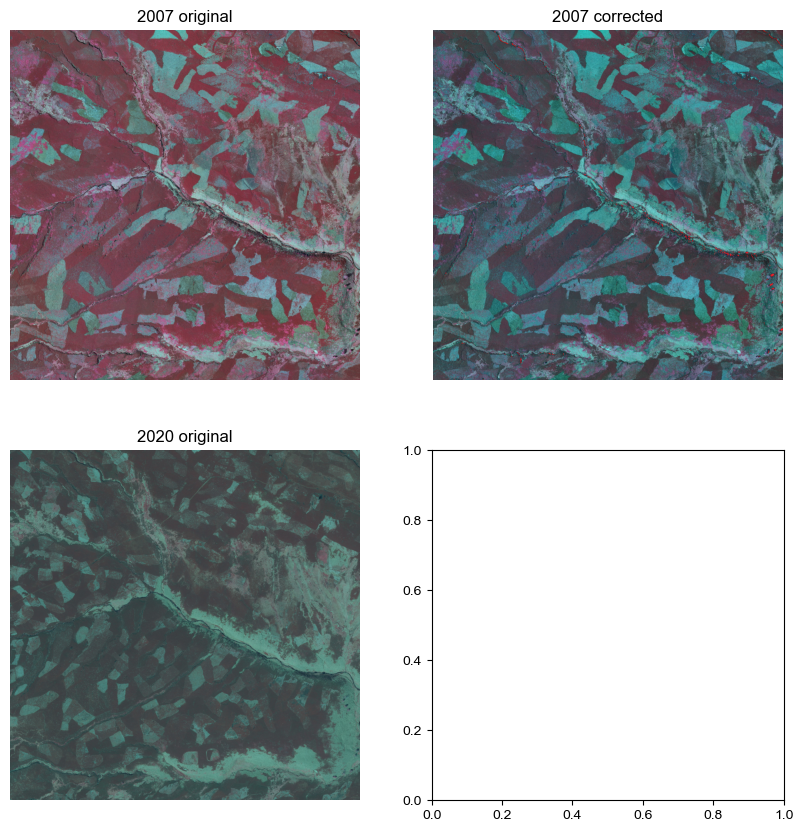

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

lcv.plot_image_simple(im=tile_old, name_file='2007 original', ax=ax[0, 0])
lcv.plot_image_simple(im=tile_new, name_file='2020 original', ax=ax[1, 0])

old_corr = tile_old 
old_corr[0, ...] = old_corr[0,...] + (tile_new[0, ...].mean() - tile_old[0, ...].mean())
lcv.plot_image_simple(im=old_corr, name_file='2007 corrected', ax=ax[0, 1])